# Content
## Import Packages
### Read Data
#### Understand and Prepare the Data
3.1 - Data Types and Dimensions

3.2 - Feature Engineering

3.3 - Missing Data Treatment
#### Compute Principal Component (from scratch)
4.1 - Prepare the Data

4.2 - Scale the Data

4.3 - Covariance Matrix

4.4 - Compute Eigenvalues and Eigenvectors

4.5 - Decide Number of Principal Components

4.6 - Calculate Principal Components
#### Compute Principal Component (using sklearn)
Conclusion

# Import


In [1]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'datetime' is used to perform date and time operations
import datetime as dt

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# Read Data

In [2]:
raw_data = pd.read_csv('C:/Users/Asus/Downloads/houseprice.csv',index_col=0)

In [3]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Understanding and Preparing Data

#### The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.

Here we will analyze and prepare data to perform regression techniques:
1. Check dimensions and data types of the dataframe
2. Study summary statistics
3. Check for missing values
4. Study correlation

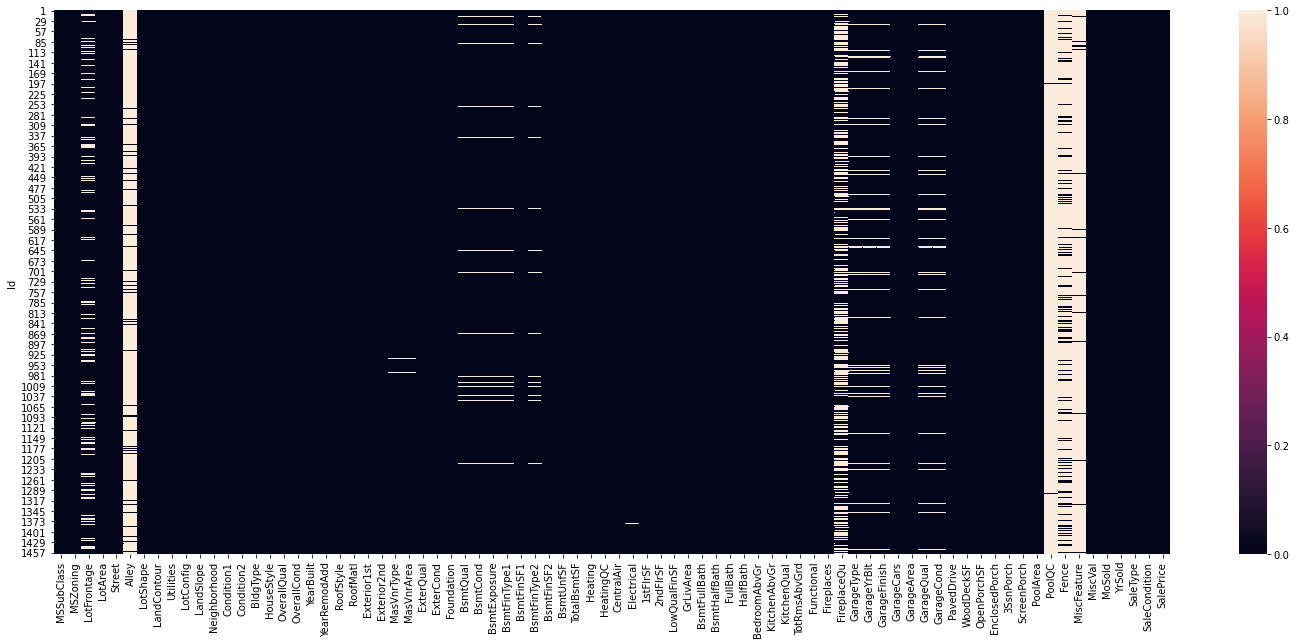

In [4]:
# 3. check for missing values
plt.figure(figsize=(25,10))
sns.heatmap(raw_data.isna())
plt.show()

In [5]:
raw_data.shape

(1460, 80)

#### We see the dataframe has 80 columns and 1460 observations

In [6]:
# 1. Check dimendions and data type 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### From the above output, we see that not all the variables are numeric. Many variables, including the target variable are categorical variables

<i>From the above output, we see that the data type of the variables like 'MSSubclass', 'OverallQual', 'OverallCond' has 'int64' data type

<i> But by data definition these are 'categorical' variables. So we will convert the data type of these variables to object

In [7]:
#Fix data type
for feature in ['MSSubClass','OverallQual','OverallCond']:
    raw_data[feature] = raw_data[feature].astype('object')

##### Let us now recheck the data type once again after we have done the conversion in the immediate last step

In [8]:
# recheck of the data type
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

# Feature Engineering

Features like 'YearBuilt' and 'YearRemodAdd' represent the initial construction year and year of remodeling respectively. Create new columns namely, 'Buiding_age' and 'Remodel_age' that provide the information about the age of building and years since remodeled

In [9]:
# 'now().year' gives the current year
# store the year as 'current_year'
current_year = int(dt.datetime.now().year)          

In [10]:
# creating 2 new columns as 'Buiding_age' and 'Remoel_age' 
Buiding_age = current_year - raw_data.YearBuilt
Remodel_age = current_year - raw_data.YearRemodAdd

In [11]:
# add the above columns in our dataframe
raw_data['Buiding_age'] = Buiding_age
raw_data['Remodel_age'] = Remodel_age

In [12]:
# printing the head of the data to check whether the new columns are added or not
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Buiding_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,18,18
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,45,45
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,20,19
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,106,51
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,21,21


In [13]:
raw_data.shape

(1460, 82)

We see the dataframe has 82 columns and 1460 observations

## Missing Data Treatment
We can not perform the matrix operations in PCA without removing null values in the data

##### First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them

In order to get the count of missing values in each column, we use the in-built function .isnull().sum()

In [14]:
# sorting variables on the basis of null values
# 'ascending = False' sorts values in the descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (raw_data.isnull().sum()*100/raw_data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
HalfBath,0,0.000000
BedroomAbvGr,0,0.000000
KitchenAbvGr,0,0.000000
KitchenQual,0,0.000000


	
The variables 'PoolQC', 'MiscFeature', 'Alley', etc. have a higher percentage of missing values. So maybe removing these variables will be a good option

But, there is a catch here!


#### According to the data definition, for the variable 'Alley', 'NA' is the type of alley access. But, Python treats this 'NA' as a null value.

Check for such false missing values and replace them with their actual meaning

In [15]:
# replace NA values in 'Alley' with a valid value, 'No alley access' 
raw_data['Alley'].fillna('No alley access' , inplace = True)

In [16]:
# 'MasVnrType' have 0.55% NA values, replace it with 'None'
raw_data['MasVnrType'].fillna('None' , inplace = True)

In [17]:
# use 'for' loop for filling NA values with 'No Basement' in the following 5 columns 
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    raw_data[col].fillna('No Basement' , inplace = True)

In [18]:
# replace NA values in 'Electrical' with its mode 'SBrkr'
raw_data['Electrical'].fillna('SBrkr' , inplace = True)

In [19]:
# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
raw_data['FireplaceQu'].fillna('No Fireplace' , inplace = True)

In [20]:
# use 'for loop' to replace NA values in the below columns with a valid value, 'No Garage' 
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    raw_data[col].fillna('No Garage' , inplace = True)

In [21]:
# replace NA values in 'PoolQC' with a valid value, 'No Pool'
raw_data['PoolQC'].fillna('No Pool' , inplace = True)

In [22]:
# replace NA values in 'Fence' with a valid value, 'No Fence'
raw_data['Fence'].fillna('No Fence' , inplace = True)

In [23]:
# replace NA values in 'MiscFeature' with a valid value, 'None'
raw_data['MiscFeature'].fillna('None' , inplace = True)

For the numerical variables, replace the missing values by their respective mean, median or mode as per the requirement

In [24]:
# 'LotFrontage' has 17.74% of missing values, Replace these with its median value
raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median() , inplace = True)

In [25]:
# 'MasVnrArea' have 0.55% missing values, replace it with its mode 0
raw_data['MasVnrArea'].fillna(0 , inplace = True)

In [26]:
# replace missing values in 'GarageYrBlt' with its mode 0
raw_data['GarageYrBlt'].fillna(0 , inplace = True)

### After replacing the null values, check for the null values for the final time

In [27]:
# any().sum() gives the total number of columns with null values
raw_data.isnull().any().sum()  

0

# Compute Principal Components (from scratch)

Perform PCA with the following steps:

1. Filter the numerical variables
2. Scale the data to get variables on the same scale
3. Compute covariance matrix
4. Calculate eigenvalues and eigenvectors of the covariance matrix
5. Decide the number of principal components
6. Obtain principal components

### Prepare the Data
Separate the numerical variables, as we will perform PCA on the numerical data

In [28]:
# select the numerical variables and store it as 'df_numeric_features'
df_numeric_features = raw_data.select_dtypes(include=[np.number])

# to select all the 'numerical' features(independent variables), drop target variable from 'df_numeric_features' 
# use 'drop' function to drop the entire column
df_num = df_numeric_features.drop('SalePrice',axis=1)       

# head() to display top five rows
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Buiding_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,61,0,0,0,0,0,2,2008,18,18
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,5,2007,45,45
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,42,0,0,0,0,0,9,2008,20,19
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,35,272,0,0,0,0,2,2006,106,51
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,84,0,0,0,0,0,12,2008,21,21


### Scale the Data
The variables like 'YearBuilt', 'MasVnrArea', 'OpenPorchSF', etc. have a different value range. We scale the variable to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others

In [29]:
# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[-0.22087509 -0.20714171  1.05099379 ...  0.13877749 -1.05099379
  -0.87866809]
 [ 0.46031974 -0.09188637  0.15673371 ... -0.61443862 -0.15673371
   0.42957697]
 [-0.08463612  0.07347998  0.9847523  ...  0.13877749 -0.9847523
  -0.83021457]
 ...
 [-0.1754621  -0.14781027 -1.00249232 ...  1.64520971  1.00249232
  -1.02402865]
 [-0.08463612 -0.08016039 -0.70440562 ...  1.64520971  0.70440562
  -0.53949344]
 [ 0.23325479 -0.05811155 -0.20759447 ...  0.13877749  0.20759447
   0.96256569]]


In [30]:
# 'shape' function gives the total number of rows and columns in the scaled data
print(df_num_std.shape)

(1460, 35)


Use these 35 standardized variables to find the principal components

#### Covariance Matrix
PCA aims to minimize the distortions and to summarize the essential information in the data. These distortions (noise, redundancy, etc.) reflect in the off-diagonal values of the covariance matrix

In [31]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(df_num_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00068540e+00  3.04730891e-01  1.16765369e-01  8.34052140e-02
   1.78590896e-01  2.14513541e-01  4.24923323e-02  1.24183267e-01
   3.63721436e-01  4.14056133e-01  7.24376356e-02  3.74949923e-02
   3.68259672e-01  9.04047865e-02 -6.98377770e-03  1.80657531e-01
   4.72540062e-02  2.37002365e-01 -4.90803219e-03  3.20737339e-01
   2.33380490e-01  9.92638352e-02  2.69723997e-01  3.23732664e-01
   7.55938857e-02  1.37107470e-01  1.02942634e-02  6.19876851e-02
   3.76808863e-02  1.80942511e-01 -2.55539426e-04  1.04578463e-02
   6.38480650e-03 -1.16765369e-01 -8.34052140e-02]
 [ 3.04730891e-01  1.00068540e+00  1.42374034e-02  1.37978777e-02
   1.03391322e-01  2.14249877e-01  1.11245941e-01 -2.62015458e-03
   2.61011910e-01  2.99679839e-01  5.10208941e-02  4.78224538e-03
   2.63296507e-01  1.58262930e-01  4.80785014e-02  1.26117008e-01
   1.42692420e-02  1.19771944e-01 -1.77960596e-02  1.90145014e-01
   2.71550003e-01  7.26485272e-02  1.54976888e-01  1.80526403e-01
   1.71815369e-01  8.4831

The covariance matrix is a square matrix consists of covariance between 35 variables

###  Compute Eigenvalues and Eigenvectors

	
Eigenvalues: The diagonal values of the diagonalized covariance matrix are called eigenvalues of the covariance matrix. Large eigenvalues correspond to large variances

Eigenvectors: The eigenvectors give directions of the new rotated axes

In [32]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [ 7.02177050e+00  3.31255010e+00  2.62014342e+00  1.89709198e+00
  1.49734667e+00  9.99263899e-02  1.36214989e-01  1.95108720e-01
  2.13950778e-01  3.01103966e-01  3.54408421e-01  4.01613912e-01
  1.27323863e+00  5.45571325e-01  5.57495391e-01  6.14455332e-01
  6.53106933e-01  6.65210391e-01  1.17628474e+00  7.70438353e-01
  7.98982584e-01  8.42159693e-01  8.54295919e-01  1.12605403e+00
  1.11386919e+00  9.17108768e-01  1.06812304e+00  1.04387620e+00
  9.58644771e-01  1.01349985e+00  9.80344037e-01 -6.46167121e-16
  2.10106943e-16 -2.50176513e-18 -3.50052781e-16] 

Eigenvectors: 
 
 [[-1.57341483e-01 -8.14685975e-02 -2.25870623e-01 ... -1.10120343e-16
  -3.67550794e-17  3.25240056e-17]
 [-1.05975763e-01 -4.68261206e-02 -2.65177563e-01 ...  5.57914663e-17
   2.39551812e-17  1.64226956e-16]
 [-2.55985052e-01  2.51938290e-01  2.26447644e-01 ... -6.24479865e-01
  -1.75602740e-02  1.19554353e-01]
 ...
 [ 1.05407256e-02  3.81464928e-02 -5.52812401e-03 ...  3.39853373e-17
  -

## Decide Number of Principal Components

There are two ways to decide the number of principal components

1) eigenvalue-one criteria: Select the components that have eigenvalues greater than 1

2) Choose the number of components before the elbow point of the scree plot

In [33]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order

eig_val.sort(reverse = True)
print(eig_val)

[7.021770499413526, 3.3125501041720944, 2.6201434201098266, 1.8970919779158193, 1.4973466747555355, 1.2732386321496953, 1.176284735325435, 1.126054028778732, 1.1138691902660691, 1.0681230423123205, 1.0438762011995268, 1.0134998547738205, 0.980344036982691, 0.9586447711070998, 0.9171087678623899, 0.8542959189393466, 0.8421596927472542, 0.7989825842753198, 0.7704383525332132, 0.6652103910693331, 0.6531069328251308, 0.614455331726778, 0.5574953911006548, 0.5455713249726756, 0.4016139120737064, 0.3544084205249464, 0.30110396633614717, 0.21395077836552612, 0.19510871979923108, 0.1362149892466232, 0.09992638992418408, 2.1010694324952631e-16, -2.501765125209966e-18, -3.5005278089426325e-16, -6.461671210787242e-16]


Now let us use the scree plot to decide the number of components

## Scree plot: Plot the eigenvalues and choose the components before elbow point

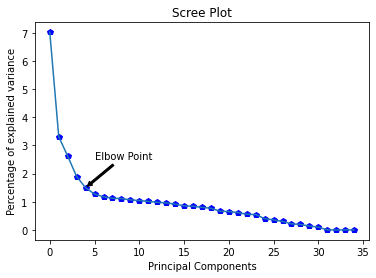

In [34]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# label the x-axis
plt.xlabel('Principal Components')    

# label the y-axis
plt.ylabel('Percentage of explained variance')      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text ='Elbow Point', xy=(4,1.5), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# title of the plot
plt.title('Scree Plot')

plt.show()   

It can be observed that, after the elbow point, principal components do not contribute much to the variance in the data. That means, we can choose eigenvectors corresponding to first five eigenvalues as principal components

## Calculate Principal Components

In [35]:
eigenvector = eig_vec[:,0:5]

eigenvector

array([[-0.15734148, -0.0814686 , -0.22587062, -0.10722212,  0.00752845],
       [-0.10597576, -0.04682612, -0.26517756,  0.01500761,  0.00786312],
       [-0.25598505,  0.25193829,  0.22644764,  0.03246855, -0.04820808],
       [-0.23277906,  0.15445072,  0.2753199 ,  0.01428159, -0.26832427],
       [-0.1912835 , -0.00691731, -0.04663417,  0.02642127,  0.07848375],
       [-0.14599174,  0.21408979, -0.34881371,  0.2640932 , -0.14572962],
       [ 0.00973451,  0.03635902, -0.17643327,  0.08698812,  0.03447938],
       [-0.10716365, -0.12447427,  0.17122358, -0.56562785,  0.04965918],
       [-0.25613609,  0.11057602, -0.25506258, -0.26315384, -0.08881146],
       [-0.25253012,  0.03831097, -0.30414927, -0.28994057, -0.09159884],
       [-0.12387082, -0.38214632,  0.18281738,  0.33480834,  0.02535135],
       [ 0.02405102, -0.14573334, -0.06296919, -0.03670041, -0.18515617],
       [-0.28645931, -0.30275762, -0.07771394,  0.06143218, -0.06346053],
       [-0.08222127,  0.23681672, -0.2

Generate a new dataset of reduced dimensions by multiplying standardize data and set of eigenvectors

In [36]:
# take the dot product of 'df_num_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
df_pca = pd.DataFrame(df_num_std.dot(eigenvector), columns= ['PC1','PC2','PC3','PC4','PC5'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.571468,0.233699,1.586585,2.219473,-0.715615
1,-0.199890,0.835867,-1.050234,-0.097077,0.627275
2,-1.740971,0.251788,1.391157,1.637273,-0.046151
3,1.470652,-1.877190,-1.515307,0.180157,1.837106
4,-4.216754,-1.116376,0.533713,1.621483,0.334647


In [37]:
# checking shape of new data
df_pca.shape

(1460, 5)

In the above output, we obtained the data with reduced dimensions. The new dataset has 1460 observations and 5 columns, i.e. we have decreased the number of numerical features from 35 to 5

Now, we will use the in-built python function from sci-kit learn library to compute principal components

# PCA Using sklearn

Use the in-built PCA function from the sklearn library to perform PCA and check the results with the obtained data with reduced dimensions (using scratch method)

In [38]:
# specify required no of components
# take 'n_components=5' based on the analysis of scree plot
pca = PCA(n_components=5, random_state=0)  

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df_num_std)

In [39]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

# head() to display top five rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.571352,-0.240622,-1.586777,-2.241474,0.753565
1,0.199709,-0.835527,1.042285,0.089567,-0.634687
2,1.741028,-0.250540,-1.389540,-1.627933,0.038217
3,-1.470503,1.871470,1.526313,-0.195221,-1.759654
4,4.216874,1.125024,-0.532845,-1.588267,-0.391245


Here, we have used the in-built PCA function to perform dimension reduction and obtained the new dataset with 5 dimensions

The signs of the first four principal components are reversed in the output obtained from the in-built function, as compared to the results obtained from scratch.

The signs depend on how the algorithm solves the eigenvector problem underlying the PCA operation. The scratch method is using the eigendecomposition method to compute eigenvalues and eigenvectors; while in-built function uses the SVD method.
The difference in the signs does not affect the variances explained by the principal components. Let, PC1 be the component of maximum variation. If we consider -(PC1) instead of PC1, then also we will obtain the same variance in the data

# Conclusion

We have performed the PCA technique using the in-built function as well as from scratch and have reduced the dimension of the numerical variables from 35 to 5. The obtained principal components explains most of the variance in the data without losing much information.